# Bifurcaciones elementales

Los modelos QIF y FHN (equivalentemente, el modelo $I_{Na_p,L}$) presentan algunos cambios en el número y la naturaleza de sus equilibrios conforme un parámetro (en estos casos, la corriente aplicada) es variada. Esto es muy importante en el sentido aplicado de nuestros modelos, pues en función de los valores de $I$ es que el potencial de membrana disponga de uno, dos, o más equilibrios a los que pueda converger. Esta variación en el número de potenciales de reposo conlleva a *cambios cualitativos* en los comportamientos a largo plazo. A este fenómeno de pérdida o modificación de un punto de equilibrio le llamaremos **bifurcación**.

## Estructura del código
<a id='intro'></a>

- [Introducción](#intro)
- [Bifurcación silla-nodo](#sn)
- [Bifurcación transcrítica](#trans)
- [Bifurcación tridente](#pitch)
- [Ejemplos](#ejemplos)

In [1]:
# Cargamos la paquetería

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from numpy import sqrt, exp, sin, cos, log

In [2]:
# Línea fase

def phase(f,x):
    
    phasep = plt.figure(figsize=(12,6))
    phasep = plt.plot(x,f(x),color="magenta")

    for k in range(len(x)):

        if f(x[k])<-0.01:

            phasep = plt.scatter([x[k]],[0.0],color="blue", s=100.0)

        elif f(x[k])>0.01:

            phasep = plt.scatter([x[k]],[0.0],color="red", s=100.0)

        else:
            
            if f(x[k-1])>0.01 and f(x[k+1])<-0.01:

                phasep = plt.scatter([x[k]],[0.0],color="black",s=200.0)
                
            else:
                
                phasep = plt.scatter([x[k]],[0.0],color="white",s=200.0,edgecolors="black")

    return phasep

# Función auxiliar de graficación

def graph(t,f):
    
    y = np.zeros(len(t))
    
    for k in range(len(t)):
        y[k] = f(t[k])
        
    return y

def bif_diag(X,I,f,df):
    
    p = plt.plot()
    
    for j in range(len(I)):
        
        for k in range(len(X)):
            
            if abs(f(X[k],I[j]))<0.01:
                
                if abs(df(X[k],I[j]))<0.001:
                    
                    p = plt.scatter([I[j]],[X[k]],marker="x",s=500.0,color="red")
                
                if df(X[k],I[j])<-0.001:
                    
                    p = plt.scatter([I[j]],[X[k]],color="black",s=200.0)
                    
                elif df(X[k],I[j])>0.001:
                    
                    p = plt.scatter([I[j]],[X[k]],color="white",s=200.0,edgecolors="black")
                
                    
    p = plt.xlim([I[0],I[len(I)-1]])
    p = plt.ylim([X[0],X[len(X)-1]])
        
    return p

Una **bifurcación**, en resumidas cuentas, es el cambio de sufre un sistema paramétrico cuando uno o varios equilibrios cambian (nacen, mueren, o modifican su estabilidad) conforme el parámetro, al cuál llamaremos **parámetro de bifurcación**, es modificado. El momento exacto de la bifurcación ocurre para un valor específico del parámetro, al cual denomiaremos **valor crítico**. Las bifurcaciones son clasificadas según los cambios que sufren los puntos de equilibrio involucrados. Como veremos, estos cambios pueden aparecer en sistemas con reglas de evolución significativamente distintas pero que, al estudiarse de manera abstracta, nos llevan a conclusiones comunes que son aplicables en cualquier sistema con similares bifurcaciones.

En esta primera exposición de bifurcaciones elementales nos concentraremos en los tres casos más comunes para sistemas unidimesionales: la bifurcación de **silla-nodo**, la **transcrítica**, y el **tridente**.

## Silla-nodo (Saddle-node)
<a id='sn'></a>

Ésta es la bifurcación presentada por el modelo QIF subumbral,
$$\dot{x}=x^2+I.$$
Como sabemos, el número de equilibrios pasa de ser dos ($I<0$) a uno ($I=0$) a ninguno ($I>0$). El parámetro de bifurcación es la corriente aplicada $I\in\mathbb{R}$, mientras que el valor crítico es $I^*=0$. Observemos la naturaleza de los puntos de equilibrio involucrados: un punto sumidero y un punto fuente ($I<0$) se acercan conforme el parámetro se incrementa, hasta chocar, formando un equilibrio nodo ($I=0$), y aniquilarse ($I>0$). Esta bifurcación implica la pérdida (o nacimiento, según sea leída) de dos puntos de equilibrio de estabilidad opuesta.

In [ ]:
# I = -1.0
I = 0.0
# I = 1.0

def SN_phase(x):
    return x**2+I

In [ ]:
x0 = linspace(-2,2,21)
pphase = phase(SN_phase,x0)
pphase = plt.ylim([-1.0,3.0])
pphase = plt.title("Silla-nodo, línea de fases")
pphase = plt.xlabel("x")
pphase = plt.ylabel("dx/dt")

Una herramienta gráfica que nos permite visualizar de manera sencilla el cambio de los puntos de equilibrio conforme varía el parámetro es el **diagrama de bifurcación**. En éste se grafican los puntos de equilibrio que se encuentren, junto con su estabilidad, para cada valor del parámetro.

In [ ]:
### Campo vectorial

def SN_bif(x,I):
    return x**2+I

### Derivada del campo vectorial (para separar sumideros de fuentes)

def dSN_bif(x,I):
    return 2*x

X = linspace(-2,2,51)
I = linspace(-1,1,101)

p = bif_diag(X,I,SN_bif,dSN_bif)
p = plt.xlabel("I")
p = plt.ylabel("x_0")
p = plt.title("Diagrama de bifurcación, Silla-nodo")

[Regresar](#intro)

## Bifurcación transcrítica
<a id='trans'></a>

Esta bifurcación ocurre cuando dos equilibrios de estabilidades opuestas chocan e *intercambian* su estabilidad. El modelo canónico en el que este fenómeno ocurre está definido por

$$\dot{x}=x^2-kx,$$

donde $k$ es el parámetro de bifurcación con valor crítico $k^*=0$. Lo que veremos en este modelo es que el origen $x_0=0$ siempre es punto de equilibrio, pero su estabilidad depende del signo de $k$. Asimismo, observamos un segundo punto de equilibrio en $x_1=k$, pero su estabilidad se invierte cuando choca con $x_0=0$ en la bifurcación.

In [ ]:
k = -0.5
# k = 0.0
# k = 1.0

def TC_phase(x):
    return x*(x-k)

In [ ]:
x0 = linspace(-2,2,21)
pphase = phase(TC_phase,x0)
pphase = plt.ylim([-1,5])
pphase = plt.title("Transcrítica, línea de fases")
pphase = plt.xlabel("x")
pphase = plt.ylabel("dx/dt")

El diagrama de bifurcación nos permitirá ver la *historia* del sistema a lo largo de la variación del parámetro $k$.

In [ ]:
### Campo vectorial

def TC_bif(x,k):
    return x**2-k*x

### Derivada del campo vectorial (para separar sumideros de fuentes)

def dTC_bif(x,k):
    return 2*x-k

X = linspace(-2,2,51)
K = linspace(-1,1,41)

p = bif_diag(X,K,TC_bif,dTC_bif)
p = plt.xlabel("k")
p = plt.ylabel("x_0")
p = plt.title("Diagrama de bifurcación, Transcrítica")

[Regresar](#intro)

## Bifurcación de tridente
<a id='pitch'></a>

La última bifurcación que estudiaremos está caracterizada por el sistema canónico

$$\dot{x}=\beta x-\tfrac{1}{3}x^3,$$

y describe la evolución de un punto de equilibrio que pierde (o invierte) su estabilidad al momento de la bifurcación en $\beta^*=0$. Tras la bifurcación aparecen otros dos equilibrios que *heredan* la estabilidad perdida del equilibrio original. Leída en sentido contrario observamos tres equilibrios, dos con estabilidades iguales y uno con estabilidad contraria, que chocan en la bifurcación, aniquilando a dos de ellos, e inviertiendo la estabilidad del sobreviviente.

La bifurcación de tridente tiene dos versiones posibles: una en la que el equilibrio original es estable y pierde su estabilidad tras la bifurcación, a la que llamaremos **supercrítica**, y otra en la que el equilibrio original es inestable y gana estabilidad tras la bifurcación, a la que llamaremos **subcrítica**.

In [ ]:
# b = -0.5
# b = 0.0
b = 0.5

def PF_phase(x):
    return b*x-1/3*x**3

In [ ]:
x0 = linspace(-2,2,21)
pphase = phase(PF_phase,x0)
pphase = plt.ylim([-0.75,0.75])
pphase = plt.title("Tridente supercrítico, línea de fases")
pphase = plt.xlabel("x")
pphase = plt.ylabel("dx/dt")

In [ ]:
### Campo vectorial

def PF_bif(x,b):
    return b*x-1/3*x**3

### Derivada del campo vectorial (para separar sumideros de fuentes)

def dPF_bif(x,b):
    return b-x**2

X = linspace(-2,2,201)
B = linspace(-1,1,41)

p = bif_diag(X,B,PF_bif,dPF_bif)
p = plt.xlabel("beta")
p = plt.ylabel("x_0")
p = plt.title("Diagrama de bifurcación, Tridente supercrítico")

[Regresar](#intro)

<a id='ejemplos'></a>
## Ejemplos

### Ejemplo: FHN revisitado

Ahora estudiaremos el modelo FHN desde una perspectiva de bifurcaciones. Recordamos que este modelo puede presentar uno, tres (y por continuidad, dos) puntos de equilibrio. Los tres puntos de equilibrio estaban sujetos a desaparecer (de dos en dos) ante cambios de $I$. Esto se explica mediante dos bifurcaciones silla-nodo: una en la que chocan el estado hiperpolarizado con el umbral, y el otro donde chocan el umbral con el estado despolarizado. Esto no es un nuevo tipo de bifurcación, sino dos bifurcaciones "independientes". Lo que sí va a cambiar de manera interesante es el diagrama de bifurcación.

In [ ]:
beta = 0.5

def FHN_bif(V,I):
    return beta*V-V**3/3+I

def dFHN_bif(V,I):
    return beta-V**2

I = linspace(-0.3,0.3,51)
V = linspace(-1.5,1.5,201)

p = bif_diag(V,I,FHN_bif,dFHN_bif)
p = plt.xlabel("I")
p = plt.ylabel("V_0")
p = plt.title("Diagrama de bifurcación, FitzHugh-Nagumo(1D)")

### Ejemplo 2: $I_{Na_p,L}$ revisitado (y compensado)

Intuituvamente, si el modelo FHN y el modelo $I_{Na_p,L}$ muestran la misma dinámica, tiene sentido que los diagramas de bifurcación de ambos modelos dibujen (esencialmente) la misma figura de sillas-nodo alternantes. Sin embargo, el modelo biofísico tiene más parámetros que podemos usar para investigar bifurcaciones, como la conductancia $g_{\rm Na}$. En la siguiente figura investigamos un poco sobre qué cambios dinámicos sufre este modelo cuando dicha conductania es variada. En particular nos interesa conocer la diferencia cualtitiva entre considerar y no considerar la corriente de sodio.

In [ ]:
def mNainf(V):
    return 1/(1+exp(-(V+25)/5))

def dmNainf(V):
    return 0.2*(exp(-(V+25)/5))/(1+exp(-(V+25)/5))**2

I = -60.0
gL = 10.0
ENa = 40.0
EL = -50.0

def INapL_bif(V,gNa):
    return I-gL*(V-EL)-gNa*mNainf(V)*(V-ENa)

def dINapL_bif(V,gNa):
    return -gL-gNa*mNainf(V)-gNa*dmNainf(V)*(V-ENa)

GNa = linspace(0.0,120.0,51)
V = linspace(-75.0,60.0,75001)

p = bif_diag(V,GNa,INapL_bif,dINapL_bif)
p = plt.xlabel("gNa")
p = plt.ylabel("V_0")
p = plt.title("Diagrama de bifurcación, INapL")
p = plt.ylim(-80,60)

Por último, haremos una pequeña modificación al modelo, de manera que la corriente aplicada se calcule en función de la conductancia $g_{\rm Na}$. Esto se hace mediante

$$I=(g_{Na}-g_{Na,TC})m_{Na,\infty}(V_{TC})(V_{TC}-E_{Na}),$$

donde $g_{Na,TC}$ y $V_{TC}$ son constantes fijas. En total, el término de arriba es negativo, por lo que la corriente aplicada decrece conforme $g_{\rm Na}$ crece. Así intentamos compensar la ganancia neta dada por el incremento de la densidad de la corriente de sodio, pero sin perder los efectos de su activación.

In [ ]:
VTC = -35.
gNaTC = 16.785
I=0.0

def INapL_TC_bif(V,gNa):
    return I-gL*(V-EL)-gNa*mNainf(V)*(V-ENa)+(gNa-gNaTC)*mNainf(VTC)*(VTC-ENa)

GNa = linspace(0.0,20.0,51)
V = linspace(-75.0,25.0,70001)

p = bif_diag(V,GNa,INapL_TC_bif,dINapL_bif)
p = plt.xlabel("gNa")
p = plt.ylabel("V_0")
p = plt.title("Diagrama de bifurcación, INapL compensado")

[Regresar](#intro)

In [3]:
C = 1.0
gKir = 2.0
gL = 0.2
EL = -50.0
EK = -80.0
Vh = -76.0
Del = -12.0

In [4]:
def hinf(V):

    return 1/(1+exp((Vh-V)/Del))

def dhinf(V):

    return (hinf(V))**2*exp((Vh-V)/Del)*1/Del

In [5]:
def kir(V,I):

    return 1/C*(I-gL*(V-EL)-gKir*hinf(V)*(V-EK))

def dkir(V,I):

    return 1/C*(-gL-gKir*hinf(V)-gKir*dhinf(V)*(V-EK))

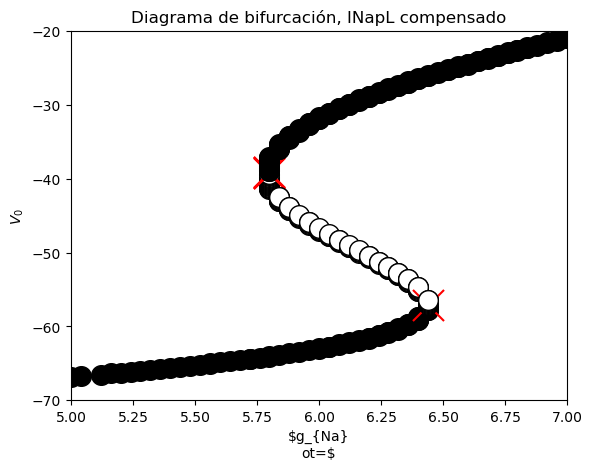

In [26]:
Ivec = linspace(5.0,7.0,51)
Vvec = linspace(-70.0,-20.0,701)

p = bif_diag(Vvec,Ivec,kir,dkir)
p = plt.xlabel("$g_{Na}$")
p = plt.ylabel("$V_0$")
p = plt.title("Diagrama de bifurcación, INapL compensado")

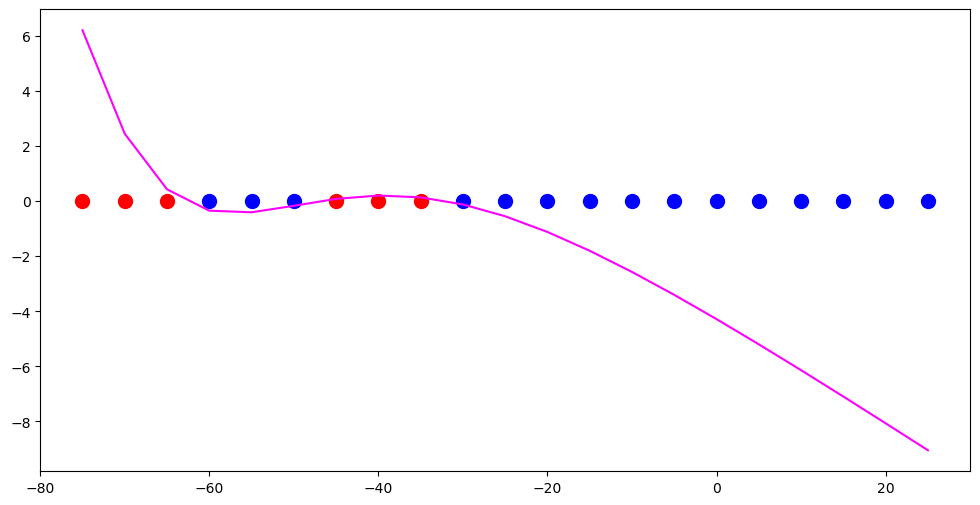

In [13]:
I0 = 6.0

Vphase = linspace(-75,25,21)

def kir_param(V):

    return kir(V,I0)

p = phase(kir_param,Vphase)